### Import module

In [1]:
from glob import glob
import os, sys
from os.path import join, dirname

import datetime, time
import csv
from glob import glob
import chardet
import numpy as np
from scipy.stats import mode
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

### Load Data

In [2]:
preprocessed_dir = '../Data/Preprocessed'
preprocessed_data_name = preprocessed_dir + '/preprocessed_data(not_scaled).csv'
scaled_p = preprocessed_dir + '/preprocessed_data(scaled).csv'

In [3]:
data = pd.read_csv(preprocessed_data_name)
cat = np.array(data[['RowID', 'Modality_cat']].drop_duplicates())
rowID_list = np.array(data['RowID'].drop_duplicates())
data = data.to_records(index=False)

In [4]:
data_1 = pd.read_csv(scaled_p)
cat_1 = np.array(data_1[['RowID', 'Modality_cat']].drop_duplicates())
rowID_list_1 = np.array(data_1['RowID'].drop_duplicates())
data_1 = data_1.to_records(index=False)

### Split Data

In [5]:
korea_ID = []
us_ID = []
for num in rowID_list:
    if num.split("_")[0] == '3' or num.split("_")[0] == '4':
        korea_ID.append(num)
    else:
        us_ID.append(num)

In [6]:
korea = []
us = []

for ID in korea_ID:
    korea.extend(data[[data["RowID"] == ID]])
    
for ID in us_ID:
    us.extend(data[[data["RowID"] == ID]])
    
korea = np.array(korea)
us = np.array(us)

C:\Users\sckim\.conda\envs\grad\lib\site-packages\numpy\core\records.py:518: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  obj = super(recarray, self).__getitem__(indx)


### EDA

#### Light value

In [7]:
klv = korea["light_val"]
ulv = us["light_val"]

In [8]:
min(klv), max(klv), np.mean(klv)

(0, 1006, 582.5528784777807)

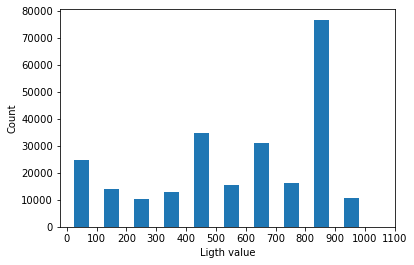

In [9]:
plt.hist(klv, histtype='bar', rwidth=.5)
plt.xticks(np.arange(0, 1200, 100))
plt.xlabel('Ligth value')
plt.ylabel('Count')
plt.show()

In [10]:
k_cnt_under_900 = 0
others = 0

for v in klv:
    if v <= 900:
        k_cnt_under_900+=1
    else:
        others+=1

print(k_cnt_under_900/len(klv)*100, " ", others/len(klv)*100)

95.51358690145697   4.48641309854303


In [11]:
min(ulv), max(ulv),np.mean(ulv)

(0, 4095, 504.9943851043919)

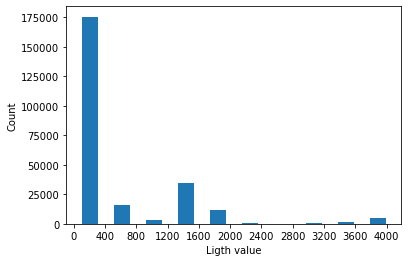

In [12]:
plt.hist(ulv, histtype='bar', rwidth=.5)
plt.xticks(np.arange(0, 4100, 400))
plt.xlabel('Ligth value')
plt.ylabel('Count')
plt.show()

In [13]:
cnt_under_400 = 0
cnt_under_2000 = 0
cnt_under_3000 = 0
cnt_over_3000 = 0

for value in ulv:
    if value <= 400:
        cnt_under_400+=1
    
    if value <= 2000:
        cnt_under_2000+=1
    elif value <= 3000:
        cnt_under_3000+=1
    else:
        cnt_over_3000+=1

print(cnt_under_2000/len(ulv) * 100, " ", cnt_under_3000/len(ulv) * 100, " ", cnt_over_3000/len(ulv) * 100)

97.1074413501565   0.4247474910452096   2.467811158798283


In [14]:
cnt_under_400/len(ulv)*100

70.73114653586757

In [15]:
def light_scaler(num):
    
    if num <= 2000:
        return round((num) / (2000) * 900)
         
    else: 
        return round(901 + (num - 2001) / (4095-2001) * 123)

In [16]:
scaled_ulv = []

for value in ulv:
    scaled_ulv.append(light_scaler(value))

In [17]:
min(scaled_ulv), max(scaled_ulv),np.mean(scaled_ulv)

(0.0, 1024.0, 208.82913695182162)

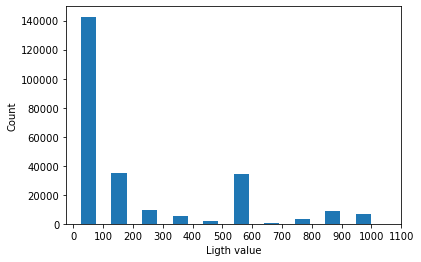

In [18]:
plt.hist(scaled_ulv, histtype='bar', rwidth=.5)
plt.xticks(np.arange(0, 1200, 100))
plt.xlabel('Ligth value')
plt.ylabel('Count')
plt.show()

#### Sound value

In [19]:
ksv = korea["sound_val"]
usv = us["sound_val"]

In [20]:
print(min(ksv), max(ksv), np.mean(ksv))

0 542 14.670562726701656


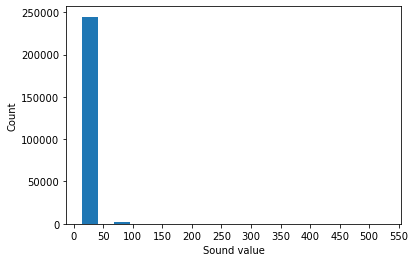

In [21]:
plt.hist(ksv, histtype='bar', rwidth=.5)
plt.xticks(np.arange(0, 560, 50))
plt.xlabel('Sound value')
plt.ylabel('Count')
plt.show()

In [22]:
under_50 = 0
over_50 = 0

for v in ksv:
    if v <=50:
        under_50+=1
    else:
        over_50+=1

print(under_50/len(ksv)*100, " ", over_50/len(ksv)*100)

99.01274595229893   0.9872540477010678


In [23]:
print(min(usv), max(usv), np.mean(usv))

48 3015 137.66727306463585


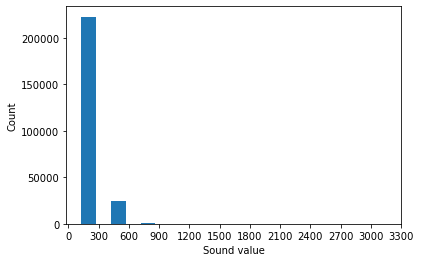

In [24]:
plt.hist(usv, histtype='bar', rwidth=.5)
plt.xticks(np.arange(0, 3500, 300))
plt.xlabel('Sound value')
plt.ylabel('Count')
plt.show()

In [25]:
under_300 = 0
under_600 = 0
over_600 = 0

for v in usv:
    if v <= 300:
        under_300+=1
    elif v <=600:
        under_600+=1
    else:
        over_600+=1

print(under_300/len(usv)*100, " ", under_600/len(usv)*100, " ", over_600/len(usv)*100)

88.88153861047469   10.818758269063215   0.29970312046209946


In [26]:
### breaout US sound value under 600
tmp = []
for v in usv:
    if v <= 600:
        tmp.append(v)

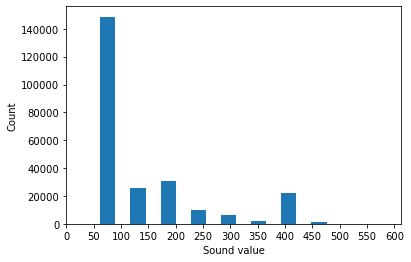

In [27]:
plt.hist(tmp, histtype='bar', rwidth=.5)
plt.xticks(np.arange(0, 650, 50))
plt.xlabel('Sound value')
plt.ylabel('Count')
plt.show()

### After Scale

In [34]:
a_korea_ID = []
a_us_ID = []
for num in rowID_list_1:
    if num.split("_")[0] == '3' or num.split("_")[0] == '4':
        a_korea_ID.append(num)
    else:
        a_us_ID.append(num)

In [35]:
a_korea = []
a_us = []

for ID in a_korea_ID:
    a_korea.extend(data_1[[data_1["RowID"] == ID]])
    
for ID in a_us_ID:
    a_us.extend(data_1[[data_1["RowID"] == ID]])
    
a_korea = np.array(a_korea)
a_us = np.array(a_us)

C:\Users\sckim\.conda\envs\grad\lib\site-packages\numpy\core\records.py:518: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  obj = super(recarray, self).__getitem__(indx)


In [37]:
a_ksv = a_korea["sound_val"]
a_usv = a_us["sound_val"]

In [38]:
print(min(a_ksv), max(a_ksv), np.mean(a_ksv))

0 3252 88.02337636020994


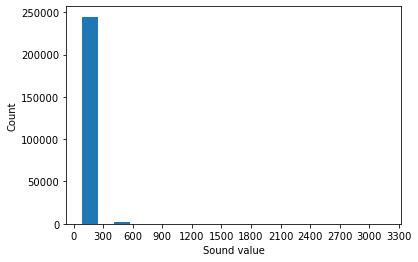

In [39]:
plt.hist(a_ksv, histtype='bar', rwidth=.5)
plt.xticks(np.arange(0, 3500, 300))
plt.xlabel('Sound value')
plt.ylabel('Count')
plt.show()

In [43]:
### breaout Korea sound value under 600
temp = []
for v in a_ksv:
    if v <= 600:
        temp.append(v)

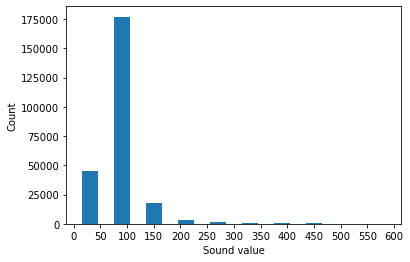

In [44]:
plt.hist(temp, histtype='bar', rwidth=.5)
plt.xticks(np.arange(0, 650, 50))
plt.xlabel('Sound value')
plt.ylabel('Count')
plt.show()